In [322]:
import numpy as np
from nearpy import Engine
from nearpy.hashes import RandomBinaryProjections
from nearpy.filters import NearestFilter, UniqueFilter
from nearpy.distances import EuclideanDistance
import matplotlib.pyplot as plt
from keras.datasets import mnist
from time import perf_counter
import pandas as pd
from ast import literal_eval

In [323]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [324]:
train_X.shape

(60000, 28, 28)

In [325]:
datasetImages = np.concatenate((train_X, test_X), axis=0)
datasetLabels = np.concatenate((train_y, test_y), axis=0)
datasetImages = datasetImages.reshape(datasetImages.shape[0], datasetImages.shape[1] * datasetImages.shape[2])

In [326]:
datasetImages.shape

(70000, 784)

In [327]:
datasetLabels.shape

(70000,)

***Create Projection Index***

In [328]:
# mnist indexing
d = datasetImages.shape[1]                           # dimension
xb = datasetImages.astype('float32') 
print('xb.shape : ', d )
print('xb.shape : ', xb.shape )

xb.shape :  784
xb.shape :  (70000, 784)


In [329]:
# Create a random binary hash with 10 bits
rbp = RandomBinaryProjections('rbp', 10)
nearest = NearestFilter(100)

# Create engine with pipeline configuration
engine = Engine(d, lshashes=[rbp], distance=EuclideanDistance(), vector_filters=[nearest, nearest])

In [330]:
# Index 1000000 random vectors (set their data to a unique string)
for index in range(datasetImages.shape[0]):
    engine.store_vector(datasetImages[index], '%d' % index)

In [357]:
xq = datasetImages[0:1].astype('float32') # Use the first image as the query vector
query = xq.reshape(784,)
x = engine.neighbours(query)
indexArr = []
distanceArr = []
print(x[1][2])
for j in range(len(x)):
    indexArr.append(int(x[j][1]))
    distanceArr.append(x[j][2])

0.634679329053171


In [350]:
print(len(indexArr))

100


In [354]:
for i in range (100) :
    print(str(indexArr[i]) + " | " + str(distanceArr[i]))

0 | 0.0
65325 | 0.634679329053171
22477 | 0.6425152289918433
30483 | 0.6559751082021268
42338 | 0.6722192700779618
24271 | 0.6873828150012954
52057 | 0.6898706129453771
29023 | 0.6912617852889372
67324 | 0.6941689361391776
68271 | 0.696869970198516
61693 | 0.6982001099370666
20034 | 0.6995557567771122
63952 | 0.6999403128658394
61612 | 0.7040791897027351
59212 | 0.706105986036804
1482 | 0.7065644654410198
22569 | 0.7072163440602293
2037 | 0.7108357817616021
62573 | 0.7147352567463476
57278 | 0.7183271921491962
68082 | 0.7204157573431366
47968 | 0.7266354249866077
12333 | 0.7291502447394334
43637 | 0.7335358947113176
67097 | 0.7339630806450501
67435 | 0.7341806962963672
45398 | 0.7367514335162367
44051 | 0.7380198802204783
52284 | 0.7399209522486816
67374 | 0.7428646118955692
47641 | 0.7429619040432391
57990 | 0.7443122220494617
32362 | 0.7450451576895107
12953 | 0.745279904190123
54849 | 0.7498578664961887
69202 | 0.7503309978809141
35093 | 0.7533840801091687
4622 | 0.7536715100171977


In [333]:
indexes = []
distances = []
def measureTime(par, indexes, distances):
    totalTime = 0
    for i in range(par) : 
        xq = datasetImages[i:i+1].astype('float32') # Use the first image as the query vector
        query = xq.reshape(784,)
        time_start = perf_counter()
        x = engine.neighbours(query)
        time_end = perf_counter()
        totalTime += (time_end - time_start)
        indexArr = []
        distanceArr = []
        for j in range(len(x)):
            indexArr.append(int(x[j][1]))
            distanceArr.append(int(x[j][2]))
        indexes.append(indexArr)
        distances.append(distanceArr)
    # report the duration
    print(f'Took {totalTime:.3f} seconds')
measureTime(1000, indexes, distances)

Took 10.335 seconds


In [334]:
for i in range(len(indexes)):
    if (len(indexes[i]) != 10) :
        print(len(indexes[i]))
        print('problems ' + str(i))

100
problems 0
100
problems 1
100
problems 2
100
problems 3
100
problems 4
100
problems 5
100
problems 6
100
problems 7
100
problems 8
22
problems 9
100
problems 10
100
problems 11
100
problems 12
100
problems 13
100
problems 14
61
problems 15
100
problems 16
100
problems 17
100
problems 18
100
problems 19
18
problems 20
100
problems 21
87
problems 22
100
problems 23
100
problems 24
100
problems 25
100
problems 26
100
problems 27
100
problems 28
100
problems 29
100
problems 30
100
problems 31
100
problems 32
100
problems 33
93
problems 34
100
problems 35
100
problems 36
100
problems 37
100
problems 38
100
problems 39
100
problems 40
100
problems 41
67
problems 42
100
problems 43
100
problems 44
100
problems 45
100
problems 46
27
problems 47
90
problems 48
100
problems 49
100
problems 50
100
problems 51
100
problems 52
100
problems 53
100
problems 54
100
problems 55
100
problems 56
100
problems 57
62
problems 58
100
problems 59
20
problems 60
100
problems 61
100
problems 62
100
problems


100
problems 774
100
problems 775
100
problems 776
100
problems 777
100
problems 778
100
problems 779
100
problems 780
100
problems 781
100
problems 782
100
problems 783
82
problems 784
100
problems 785
100
problems 786
100
problems 787
100
problems 788
100
problems 789
100
problems 790
100
problems 791
100
problems 792
100
problems 793
100
problems 794
100
problems 795
100
problems 796
100
problems 797
100
problems 798
100
problems 799
100
problems 800
100
problems 801
100
problems 802
100
problems 803
27
problems 804
100
problems 805
100
problems 806
100
problems 807
90
problems 808
100
problems 809
100
problems 810
100
problems 811
100
problems 812
100
problems 813
100
problems 814
100
problems 815
100
problems 816
100
problems 817
100
problems 818
100
problems 819
100
problems 820
100
problems 821
100
problems 822
100
problems 823
100
problems 824
100
problems 825
100
problems 826
100
problems 827
98
problems 828
100
problems 829
100
problems 830
100
problems 831
100
problems 832


In [335]:
print(len(indexes), len(indexes[2]))

1000 100


In [336]:
indexes = np.array(indexes)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1000,) + inhomogeneous part.

In [ ]:
print(N[0][0][1])
print(len(N[0]))

NameError: name 'N' is not defined

In [ ]:
def draw_mnist(arr):
    indexes = 100
    plt.figure(figsize=(indexes*4,4))
    j = 0
    for i in range(indexes):
        plt.subplot(1, indexes, j + 1)
        j+=1
        plt.imshow(np.reshape(arr[i], (28,28)), cmap=plt.cm.gray)

In [ ]:
arr = np.empty([0,784])
i = 0
for i in range(100):
    # print('index : ', N[0][i][1], '\ndistance : ', N[0][i][2], '\narr : ', N[0][i][0])
    arr = np.vstack((arr, N[0][i][0]))
print('arr.shape : ', arr.shape)

arr.shape :  (100, 784)


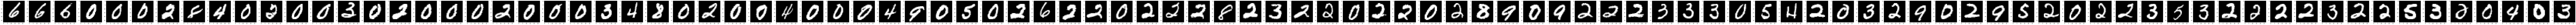

In [ ]:
draw_mnist(arr)